### The 2021 election results data is currently available the the ECI results website dispayed as html tables

Note: This extract method will not be available once the results are removed from the results website. Use already extracted data

#Pre req

Load required modules and libraries

In [1]:
!pip install xlsxwriter

     |████████████████████████████████| 153kB 7.6MB/s 


In [2]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import xlsxwriter
import matplotlib.pyplot as plt
from IPython.display import HTML, display


In [3]:
#Setting for notebook
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.width = None
pd.options.display.max_colwidth = None

def my_css():
   display(HTML("""<style>table.dataframe td{white-space: nowrap;}</style>"""))

get_ipython().events.register('pre_run_cell', my_css)

#Extracting State wise summary

Results are available for all states in which election is  conducted. The states are represented as S01, S02.. in the website URL

Extract data using html response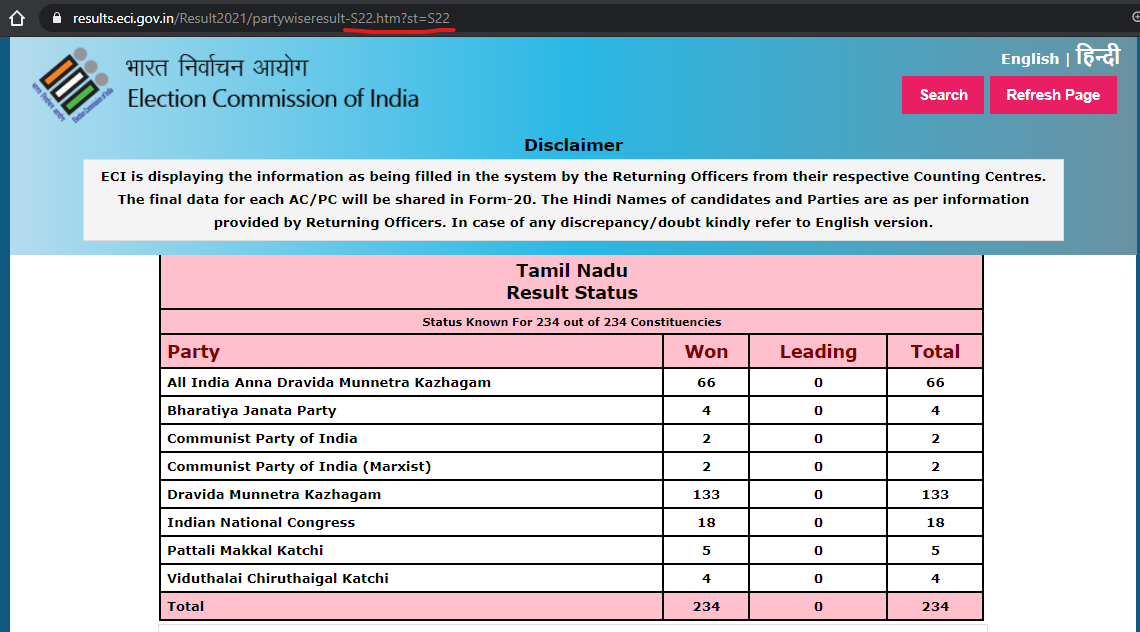

In [4]:
#List of states where elections were conducted
Elections21S = ["S03", "S11", "S22", "S25"]  
soup = {}
for state in Elections21S:

  #URL for election results website
  #!!! Wont work once the results are removed from site. Use already extracted data
  url = "https://results.eci.gov.in/Result2021/partywiseresult-" + state + ".htm?st=" + state
  response = requests.get(url)

  soup[state] = BeautifulSoup(response.content, "html.parser")

Extract the table from the html data

In [5]:
State_of_interest = Elections21S[2]
Const_count = 234

#Extracting data from the html and and building it in a nested list
table = soup[State_of_interest].find_all(id="div1")[0].find("table")
header = table.find_all("tr")

table_data = []

for i in range(2, len(header)):
  cell_data = []
  cell = header[i].find_all("td")
  for j in cell:
    cell_data.append(j.get_text())
  table_data.append(cell_data)

Convert and save as data frame

In [6]:
#Converting nested list to dataframe
table_df_S = pd.DataFrame(table_data, columns=["Party", "Win", "Leading", "Total Win"])
table_df_S.style.set_table_attributes("style='display:inline'").set_caption("hello")
table_df_S.drop(0, inplace=True)
table_df_S

,Party,Win,Leading,Total Win
1,All India Anna Dravida Munnetra Kazhagam,66,0,66
2,Bharatiya Janata Party,4,0,4
3,Communist Party of India,2,0,2
4,Communist Party of India (Marxist),2,0,2
5,Dravida Munnetra Kazhagam,133,0,133
6,Indian National Congress,18,0,18
7,Pattali Makkal Katchi,5,0,5
8,Viduthalai Chiruthaigal Katchi,4,0,4
9,Total,234,0,234


In [7]:
#Saving the df as a csv
table_df_S.to_csv("State_wise_summary_2021_for_" + State_of_interest +  '.csv', index=False)

#Extracting Const summary

## To extract data with constituency data in seperate sheets

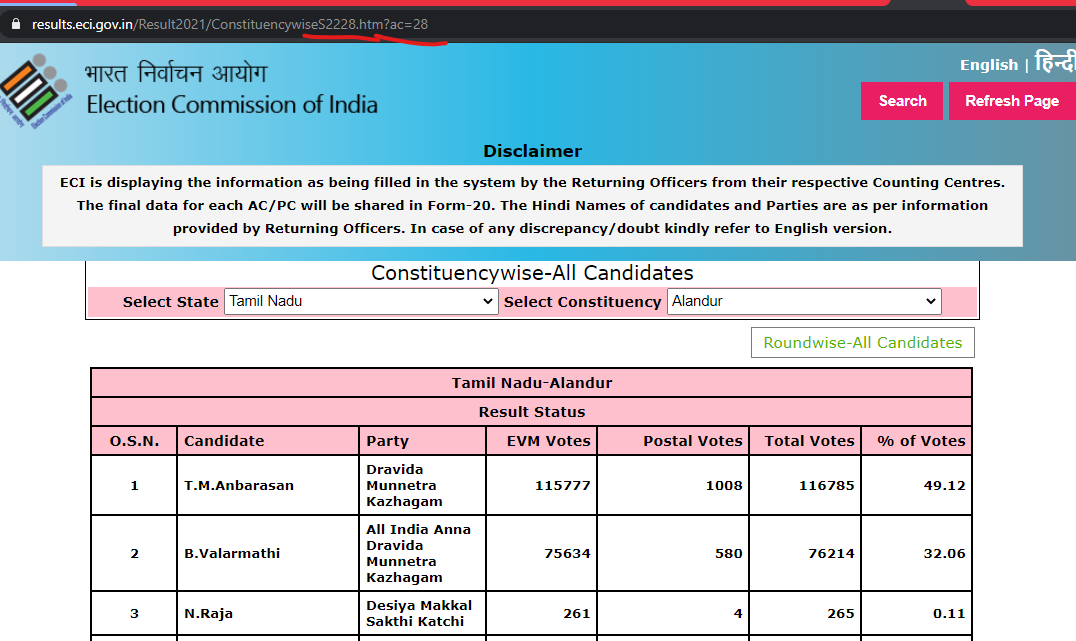

In [8]:
#Extract data from the site and store it as a dict 

const_dict = {}
for const_no in range(1, Const_count + 1):

  url = "https://results.eci.gov.in/Result2021/ConstituencywiseS22" + str(const_no) + ".htm?ac=" + str(const_no)
  response = requests.get(url)

  soup = BeautifulSoup(response.content, "html.parser")

  table = soup.find_all(id="div1")[0].find("table")
  header = table.find_all("tr")
  key = header[0].find("td").get_text().strip().split("-",1)[1] 

  table_data = []

  for i in range(2, len(header)):
    cell_data = []
    cell = header[i].find_all("td")
    for j in cell:
      cell_data.append(j.get_text())
    table_data.append(cell_data)

  table_df = pd.DataFrame(table_data, columns=["O.S.N.",	"Candidate",	"Party",	"EVM Votes",	"Postal Votes",	"Total Votes",	"% of Votes"])
  table_df.drop(0, inplace=True)

  ## Uncomment to check if there is any error in the data
  # Actual_tot = table_df["Total Votes"].astype(int)[table_df['Candidate'] == "Total"].values[0]
  # Checker_tot = table_df["Total Votes"].astype(int).sum() - Actual_tot
  # if Actual_tot != Checker_tot:
  #   print(key, Actual_tot, Checker_tot)

  const_dict[key] = table_df

In [9]:
with pd.ExcelWriter('Const_wise_sum_21_' + State_of_interest +  '_Detailed.xlsx', engine='xlsxwriter') as writer:
  for i in const_dict.items():
    i[1].to_excel(writer, sheet_name=i[0])

#Extracting data as a single dataframe - csv file

In [10]:
table_data = []

for const_no in range(1, Const_count + 1):

  url = "https://results.eci.gov.in/Result2021/ConstituencywiseS22" + str(const_no) + ".htm?ac=" + str(const_no)
  response = requests.get(url)

  soup = BeautifulSoup(response.content, "html.parser")

  table = soup.find_all(id="div1")[0].find("table")
  header = table.find_all("tr")
  key = header[0].find("td").get_text().strip().split("-",1)[1] 

  for i in range(3, len(header)-1):
    # Adding constituency
    cell_data = [key]
    cell = header[i].find_all("td")
    for j in cell:
      cell_data.append(j.get_text())
    table_data.append(cell_data)


In [11]:
#Saving the data in a csv file
Cons_result_2021 = pd.DataFrame(table_data, columns=["Constituency", "O.S.N.",	"Candidate",	"Party",	"EVM Votes",	"Postal Votes",	"Total Votes",	"% of Votes"])
Cons_result_2021[["EVM Votes",	"Postal Votes",	"Total Votes"]] = Cons_result_2021[["EVM Votes",	"Postal Votes",	"Total Votes"]].astype(int)
Cons_result_2021["% of Votes"] = Cons_result_2021["% of Votes"].astype(float)

Cons_result_2021.to_csv("Const_wise_sum_21_" + State_of_interest +  ".csv", index=False)

Cons_result_2021.head()

,Constituency,O.S.N.,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes
0,Gummidipoondi,1,GOVINDARAJAN T.J,Dravida Munnetra Kazhagam,125001,1451,126452,56.94
1,Gummidipoondi,2,DILLIY K.M,Desiya Murpokku Dravida Kazhagam,2553,23,2576,1.16
2,Gummidipoondi,3,NAGARAJ S,Bahujan Samaj Party,1031,7,1038,0.47
3,Gummidipoondi,4,USHA,Naam Tamilar Katchi,11643,58,11701,5.27
4,Gummidipoondi,5,GOWTHAM J,Anaithu Makkal Arasiyal Katchi,254,0,254,0.11


In [12]:
Cons_result_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232 entries, 0 to 4231
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Constituency  4232 non-null   object 
 1   O.S.N.        4232 non-null   object 
 2   Candidate     4232 non-null   object 
 3   Party         4232 non-null   object 
 4   EVM Votes     4232 non-null   int64  
 5   Postal Votes  4232 non-null   int64  
 6   Total Votes   4232 non-null   int64  
 7   % of Votes    4232 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 264.6+ KB
